In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
boston = pd.read_csv('boston.csv', sep=',', header=0, index_col=0)
boston.shape

(506, 14)

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Описание признаков

1. crim - уровень преступности на душу населения 
2. zn - доля жилых зон площадью больше 25 000 квадратных футов 
3. indus - доля неторговых территорий во владении бизнеса на пригороде
4. chas - район прилегает к реке Чарльз (= 1 если прилегает; 0 иначе). 
5. nox - концентрация окисей азота (доля от 10 миллионов). 
6. rm - среднее число комнат в жилище 
7. age - доля единиц жилья с проживащим собственником, построенных до 1940 года
8. dis - взвешеннное среднее расстояние до 5 рабочих центров бостона 
9. rad - индекс доступности радиальных автомагистралей
10. tax - отношение имущественноо налога к 10 000 \$
11. ptratio - отношение числа учащихся к числу учителей в пригороде
12. black = 1000(Bk - 0.63)^2, где Bk - доля афроамериканцев среди населения
13. lstat - процент бедного населения
14. medv - медиана стоимости домов с проживающим собственником в тысячах

In [4]:
boston = boston.astype(float)
target_column = boston.columns[-1]

In [5]:
def plot_feature_target(X, y):
    fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,4))
    for i in xrange(X.shape[1]):
        row_index = i//7
        col_index = i%7
        axes[row_index, col_index].plot(X[:, i], y, '.')
        axes[row_index, col_index].set_xlabel(boston.columns[i])
        axes[row_index, col_index].set_ylabel(target_column)
        axes[row_index, col_index].set_xticks([])
        axes[row_index, col_index].set_yticks([])

    axes[1, 6].hist(y)
    axes[1, 6].set_xticks([])
    axes[1, 6].set_yticks([])
    axes[1, 6].set_xlabel(target_column)
    plt.show()

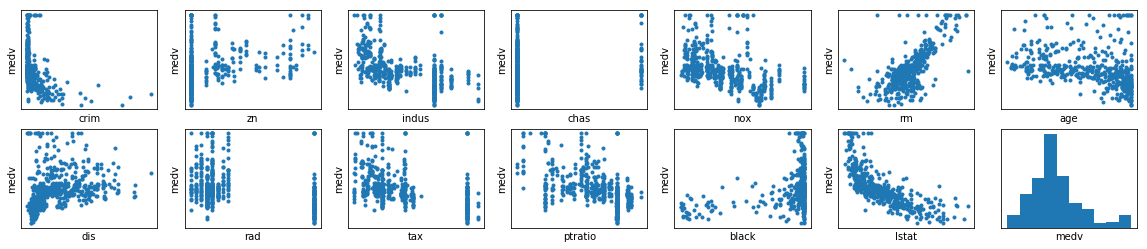

In [6]:
plot_feature_target(boston.drop(target_column, axis=1).values, boston[target_column].values)

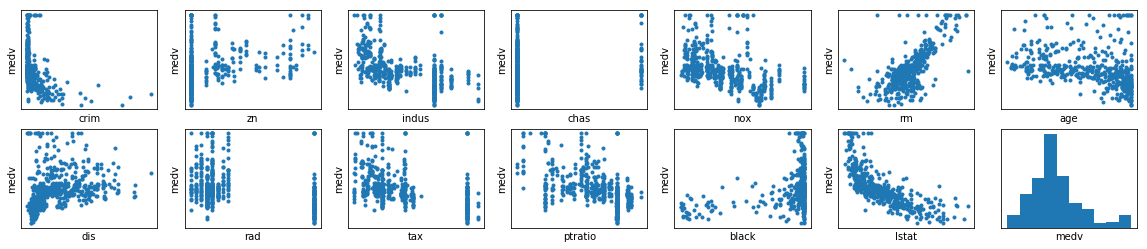

In [7]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(boston.drop(target_column, axis=1))
y = boston[target_column].values

plot_feature_target(X, y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(X_train.shape)
print(X_test.shape)

(339L, 13L)
(167L, 13L)


Обучающая выборка:


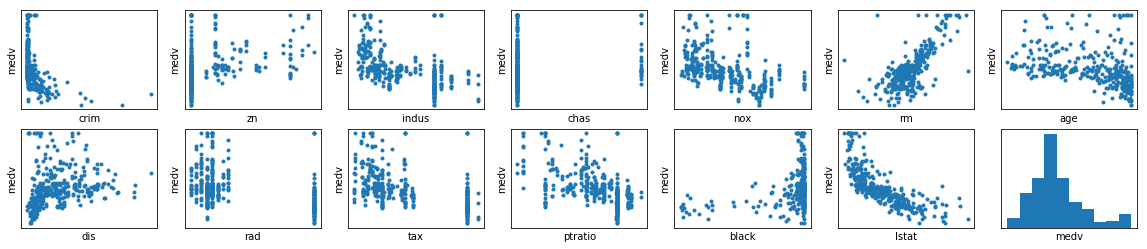

Тестовая выборка: 


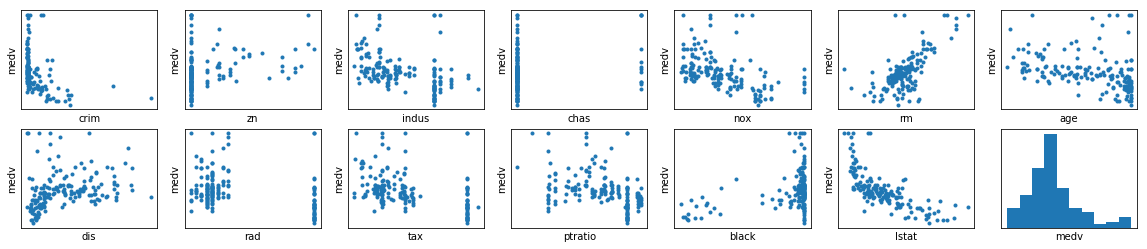

In [9]:
print('Обучающая выборка:')
plot_feature_target(X_train, y_train)

print('Тестовая выборка: ')
plot_feature_target(X_test, y_test)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

linreg = LinearRegression(n_jobs=4)
linreg.fit(X_train, y_train)
y_train_linreg = linreg.predict(X_train)
y_test_linreg = linreg.predict(X_test)

print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_linreg))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_linreg))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_linreg))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_linreg))

print('\nКоэффициенты:')
print('\n'.join([': '.join([boston.columns[i], "%.4f" % linreg.coef_[i]]) for i in xrange(X_train.shape[1])]))

MSE на обучающей выборке: 19.9856
MSE на тестовой выборке: 26.5586

Доля объясненной диспперсии на обучающей выборке: 0.7677
Доля объясненной дисперсии на тестовой выборке: 0.6719

Коэффициенты:
crim: -1.0238
zn: 1.1098
indus: 0.0213
chas: 0.6388
nox: -1.9213
rm: 2.5729
age: -0.3205
dis: -3.3408
rad: 2.1940
tax: -1.8288
ptratio: -2.2667
black: 0.5637
lstat: -3.7083


In [11]:
from cycler import cycler
from sklearn.linear_model import Ridge

def plot_reg(X_train, y_train, X_test, y_test, model=Ridge, min_power=-10, max_power=-2, n_alphas=200, coef_names=None, norm=False):
    # #############################################################################
    # Вычислим значения коэффициентов при разных значениях параметра регуляризации

    n_alphas = n_alphas
    alphas = np.logspace(min_power, max_power, n_alphas) # зададим логарифмическую шкалу для параметра регуляризации

    coefs = []
    mse_train = []
    mse_test = []
    
    for a in alphas:
        regr = model(alpha=a, normalize=norm)
        regr.fit(X_train, y_train)
        coefs.append(regr.coef_)
        mse_train.append(mean_squared_error(y_train, regr.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, regr.predict(X_test)))

    # #############################################################################
    # Нарисуем график
    
    plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'k', 'm']) *
                           cycler('linestyle', ['-', '--', ':', '-.'])))

    fig, (ax, ax_mse) = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # обратная шкала
    ax.set_xlabel('alpha')
    ax.set_ylabel('coef')
    if not (coef_names is None):
        ax.legend(coef_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    ax_mse.plot(alphas, mse_train, '-b')
    ax_mse.plot(alphas, mse_test, '-r')
    ax_mse.set_xscale('log')
    ax_mse.set_xlim(ax_mse.get_xlim()[::-1])  # обратная шкала
    ax_mse.set_xlabel('alpha')
    ax_mse.set_ylabel('mse')
    ax_mse.legend(['mse_train', 'mse_test'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

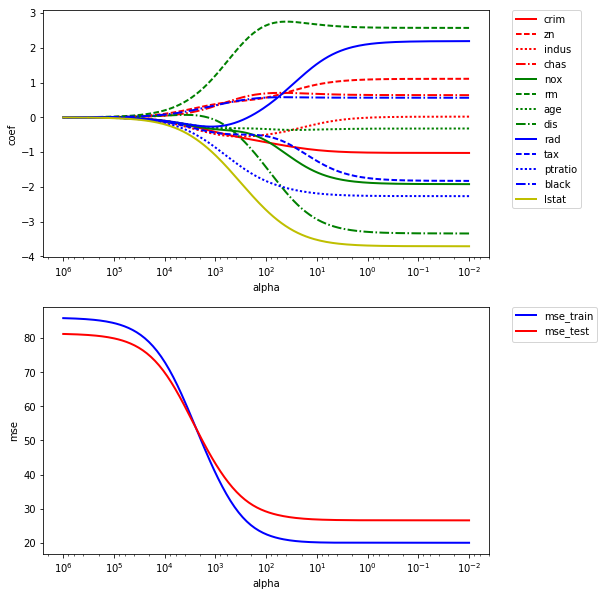

In [12]:
plot_reg(X_train, y_train, X_test, y_test, Ridge, min_power=-2, max_power=6, coef_names=boston.columns[:-1])

In [13]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 6, num=200)
ridgeregCV = RidgeCV(alphas=alphas)
ridgeregCV.fit(X_train, y_train)

y_train_ridgeregCV = ridgeregCV.predict(X_train)
y_test_ridgeregCV = ridgeregCV.predict(X_test)

print('Alpha: %.2e' % ridgeregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_ridgeregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_ridgeregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_ridgeregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_ridgeregCV))

print('\nКоэффициенты:')
print('\n'.join([': '.join([boston.columns[i], "%.4f" % ridgeregCV.coef_[i]]) for i in xrange(X_train.shape[1])]))

Alpha: 7.84e+00
MSE на обучающей выборке: 20.0687
MSE на тестовой выборке: 26.7554

Доля объясненной диспперсии на обучающей выборке: 0.7667
Доля объясненной дисперсии на тестовой выборке: 0.6691

Коэффициенты:
crim: -0.9555
zn: 0.9724
indus: -0.1595
chas: 0.6698
nox: -1.6429
rm: 2.6572
age: -0.3487
dis: -3.0115
rad: 1.6411
tax: -1.3416
ptratio: -2.2018
black: 0.5690
lstat: -3.5599


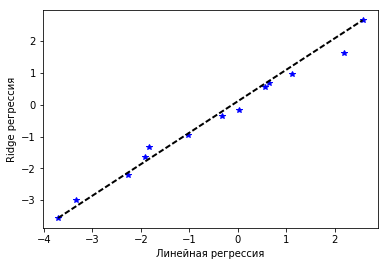

In [14]:
plt.plot(linreg.coef_, ridgeregCV.coef_, '*b')
plt.xlabel('Линейная регрессия'.decode('utf-8'))
plt.ylabel('Ridge регрессия'.decode('utf-8'))
plt.plot([np.min(linreg.coef_), np.max(linreg.coef_)], [np.min(ridgeregCV.coef_), np.max(ridgeregCV.coef_)], '--k')
plt.plot()
plt.show()

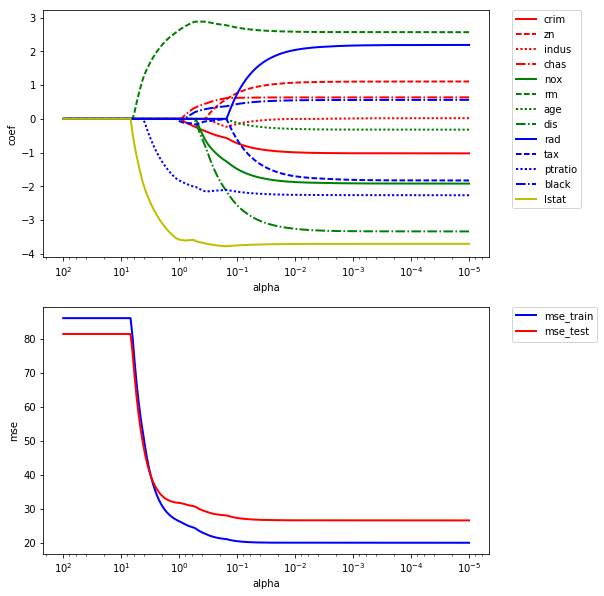

In [15]:
from sklearn.linear_model import Lasso
plot_reg(X_train, y_train, X_test, y_test, Lasso, min_power=-5, max_power=2, coef_names=boston.columns[:-1])

In [16]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-5, 2, num=200)
lassoregCV = LassoCV(alphas=alphas)
lassoregCV.fit(X_train, y_train)

y_train_lassoregCV = lassoregCV.predict(X_train)
y_test_lassoregCV = lassoregCV.predict(X_test)

print('Alpha: %.2e' % lassoregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_lassoregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_lassoregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_lassoregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_lassoregCV))

print('\nКоэффициенты:')
print('\n'.join([': '.join([boston.columns[i], "%.4f" % lassoregCV.coef_[i]]) for i in xrange(X_train.shape[1])]))

Alpha: 3.87e-02
MSE на обучающей выборке: 20.0550
MSE на тестовой выборке: 26.7251

Доля объясненной диспперсии на обучающей выборке: 0.7669
Доля объясненной дисперсии на тестовой выборке: 0.6695

Коэффициенты:
crim: -0.9070
zn: 0.9766
indus: -0.0457
chas: 0.6335
nox: -1.7527
rm: 2.6252
age: -0.2415
dis: -3.0390
rad: 1.6302
tax: -1.3598
ptratio: -2.2256
black: 0.5156
lstat: -3.7269


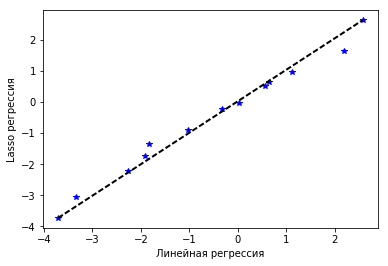

In [17]:
plt.plot(linreg.coef_, lassoregCV.coef_, '*b')
plt.xlabel('Линейная регрессия'.decode('utf-8'))
plt.ylabel('Lasso регрессия'.decode('utf-8'))
plt.plot([np.min(linreg.coef_), np.max(linreg.coef_)], [np.min(lassoregCV.coef_), np.max(lassoregCV.coef_)], '--k')
plt.plot()
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train2 = poly.fit_transform(X_train)
X_train2 = StandardScaler().fit_transform(X_train2)

X_test2 = poly.fit_transform(X_test)
X_test2 = StandardScaler().fit_transform(X_test2)

feature_names = poly.get_feature_names(boston.columns[:-1])
print(feature_names)

['1', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'crim^2', 'crim zn', 'crim indus', 'crim chas', 'crim nox', 'crim rm', 'crim age', 'crim dis', 'crim rad', 'crim tax', 'crim ptratio', 'crim black', 'crim lstat', 'zn^2', 'zn indus', 'zn chas', 'zn nox', 'zn rm', 'zn age', 'zn dis', 'zn rad', 'zn tax', 'zn ptratio', 'zn black', 'zn lstat', 'indus^2', 'indus chas', 'indus nox', 'indus rm', 'indus age', 'indus dis', 'indus rad', 'indus tax', 'indus ptratio', 'indus black', 'indus lstat', 'chas^2', 'chas nox', 'chas rm', 'chas age', 'chas dis', 'chas rad', 'chas tax', 'chas ptratio', 'chas black', 'chas lstat', 'nox^2', 'nox rm', 'nox age', 'nox dis', 'nox rad', 'nox tax', 'nox ptratio', 'nox black', 'nox lstat', 'rm^2', 'rm age', 'rm dis', 'rm rad', 'rm tax', 'rm ptratio', 'rm black', 'rm lstat', 'age^2', 'age dis', 'age rad', 'age tax', 'age ptratio', 'age black', 'age lstat', 'dis^2', 'dis rad', 'dis tax', 'dis ptratio', 'dis blac

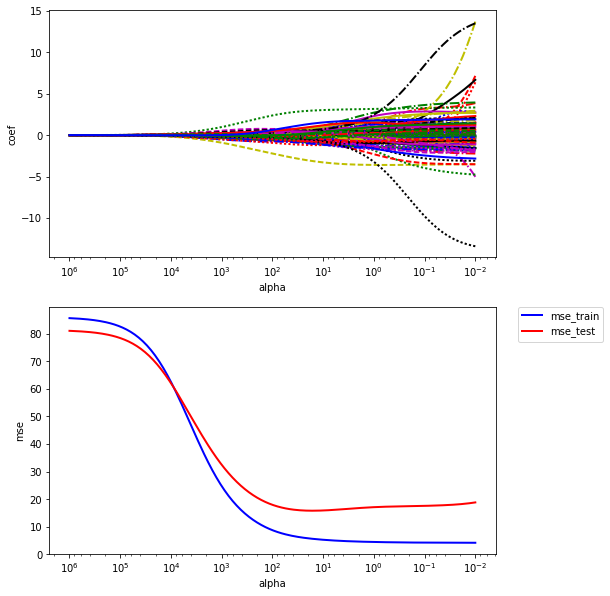

In [19]:
plot_reg(X_train2, y_train, X_test2, y_test, Ridge, min_power=-2, max_power=6)

In [20]:
alphas = np.logspace(-2, 6, num=200)
ridgeregCV = RidgeCV(alphas=alphas, normalize=True, store_cv_values=True)
ridgeregCV.fit(X_train2, y_train)

y_train_ridgeregCV = ridgeregCV.predict(X_train2)
y_test_ridgeregCV = ridgeregCV.predict(X_test2)

print('Alpha: %.2e' % ridgeregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_ridgeregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_ridgeregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_ridgeregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_ridgeregCV))

Alpha: 6.99e-02
MSE на обучающей выборке: 5.9641
MSE на тестовой выборке: 15.8666

Доля объясненной диспперсии на обучающей выборке: 0.9307
Доля объясненной дисперсии на тестовой выборке: 0.8126


In [21]:
print('Число коэффициентов, равных 0: %i' % np.sum(ridgeregCV.coef_ == 0))

Число коэффициентов, равных 0: 1


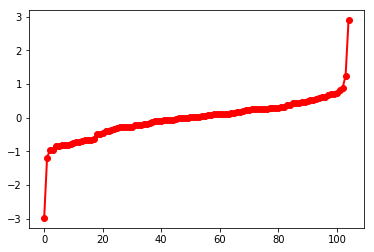

In [22]:
plt.plot(np.arange(len(ridgeregCV.coef_)), np.sort(ridgeregCV.coef_), '-o')
plt.show()

In [23]:
print('Признак с максимальным коэффициентом: %s' % feature_names[np.argmax(ridgeregCV.coef_)])
print('Признак с минимальным коэффициентом: %s' % feature_names[np.argmin(ridgeregCV.coef_)])

Признак с максимальным коэффициентом: rm
Признак с минимальным коэффициентом: lstat


C:\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


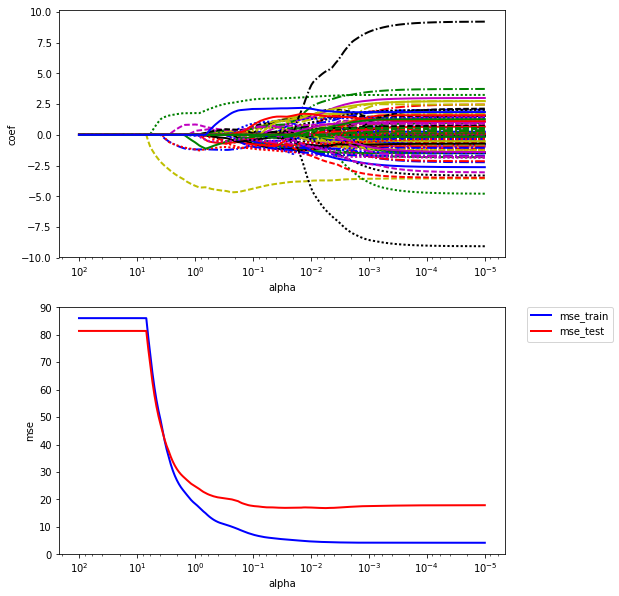

In [24]:
plot_reg(X_train2, y_train, X_test2, y_test, Lasso, min_power=-5, max_power=2)

In [25]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-5, 2, num=200)
lassoregCV = LassoCV(alphas=alphas)
lassoregCV.fit(X_train2, y_train)

y_train_lassoregCV = lassoregCV.predict(X_train2)
y_test_lassoregCV = lassoregCV.predict(X_test2)

print('Alpha: %.2e' % lassoregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_lassoregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_lassoregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_lassoregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_lassoregCV))

Alpha: 5.35e-02
MSE на обучающей выборке: 6.0748
MSE на тестовой выборке: 17.1076

Доля объясненной диспперсии на обучающей выборке: 0.9294
Доля объясненной дисперсии на тестовой выборке: 0.7972


In [26]:
print('Число коэффициентов, равных 0: %i' % np.sum(lassoregCV.coef_ == 0))

Число коэффициентов, равных 0: 55


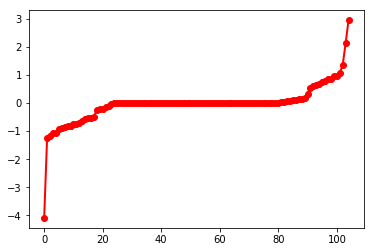

In [27]:
plt.plot(np.arange(len(lassoregCV.coef_)), np.sort(lassoregCV.coef_), '-o')
plt.show()

In [32]:
print('Признаки с максимальными коэффициентоми: %s' % feature_names[np.argsort(lassoregCV.coef_)[-3:]])
print('Признак с минимальным коэффициентом: %s' % feature_names[np.argmin(lassoregCV.coef_)])

TypeError: only integer scalar arrays can be converted to a scalar index

In [33]:
np.argsort(lassoregCV.coef_)

array([ 13,  74,  70,  83,  64,  10,  72,  52,  98,  59,   8,  49,  51,
         7,  47,  11,   5,  94,  88,  18, 103,  81,  76,  29,  73,  97,
       102,  54,  93,  56,  57, 101,  60,  61,  62, 100,  65,  82,  66,
        99,  71,  90,  92,  89,  75,  87,  85,  77,  78,  80,  68,  91,
         0,  34,  20,  21,  22,  14,  23,  24,  25,  26,   9,  28,  30,
        31,  32,  15,  35,  16,  42,  37,  48,  38,  46,  40,   3,  45,
         2,   1,   4,  55,  36,  50,  39,  27,  67,  19,  33,  43,  44,
        86,  53,  84,  95,  69,  79,  12,  41,  63,  17,  58,  96, 104,   6], dtype=int64)